### iris data set을 활용한 KMeans Clustering

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris() # dict과 유사한 형식의 class
data = pd.DataFrame(data = iris['data'], columns = iris['feature_names']) # DataFrame 형식으로 만들어줌 
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


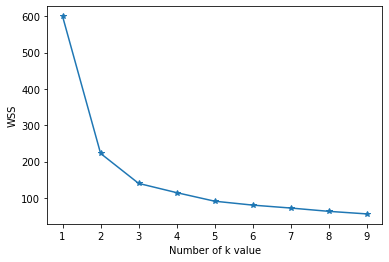

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
data_sc = sc.fit_transform(data) # 표준화(변수의 단위가 다를 때 같은 기준으로 통일하기 위함)

# elbow method를 통한 k값 정하기
wss = [] # Within group sum of squares: 같은 군집 내에서의 분산
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_sc)
    wss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9],wss,marker='*')
plt.xlabel('Number of k value')
plt.ylabel('WSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(data_sc)
data['cluster'] = clusters.labels_ # KMeans를 통해 도출된 cluster 값을 추가

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,0


In [6]:
data.groupby('cluster').describe().transpose() # cluster별 속성의 요약 값

cluster                          0          1          2          3
sepal length (cm) count  28.000000  51.000000  22.000000  49.000000
                  mean    5.225000   6.725490   4.727273   5.779592
                  std     0.268914   0.515691   0.227160   0.404135
                  min     4.600000   5.800000   4.300000   4.900000
                  25%     5.075000   6.400000   4.600000   5.600000
                  50%     5.150000   6.700000   4.800000   5.800000
                  75%     5.400000   6.950000   4.900000   6.100000
                  max     5.800000   7.900000   5.100000   6.500000
sepal width (cm)  count  28.000000  51.000000  22.000000  49.000000
                  mean    3.678571   3.082353   3.109091   2.653061
                  std     0.265772   0.256676   0.232807   0.252572
                  min     3.400000   2.500000   2.300000   2.000000
                  25%     3.500000   3.000000   3.000000   2.500000
                  50%     3.600000   3.000000   3.100000   2.700000
                  75%     3.800000   3.200000   3.200000   2.800000
                  max     4.400000   3.800000   3.400000   3.000000
petal length (cm) count  28.000000  51.000000  22.000000  49.000000
                  mean    1.475000   5.462745   1.445455   4.326531
                  std     0.173472   0.636855   0.176547   0.557814
                  min     1.000000   4.400000   1.100000   3.000000
                  25%     1.400000   4.950000   1.325000   4.000000
                  50%     1.500000   5.500000   1.400000   4.300000
                  75%     1.525000   5.850000   1.575000   4.700000
                  max     1.900000   6.900000   1.900000   5.600000
petal width (cm)  count  28.000000  51.000000  22.000000  49.000000
                  mean    0.271429   1.960784   0.213636   1.379592
                  std     0.115011   0.338277   0.083355   0.277624
                  min     0.100000   1.300000   0.100000   1.000000
                  25%     0.200000   1.800000   0.200000   1.200000
                  50%     0.200000   2.000000   0.200000   1.300000
                  75%     0.400000   2.300000   0.200000   1.500000
                  max     0.600000   2.500000   0.500000   2.000000

In [9]:
# clustering visualization
from sklearn.decomposition import PCA
X = data_sc
pca = PCA(n_components=2) # PCA 정의(2개 변수로 차원 축소)
pca.fit(X) # 실행(주성분을 찾음)
x_pca = pca.transform(X) # 실행(새로운 주성분으로 데이터 변환)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = data['cluster']

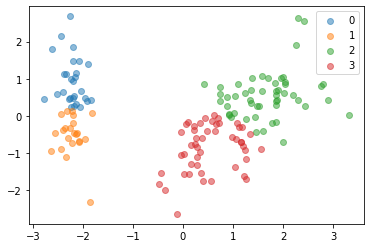

In [14]:
for i in data['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1],alpha=0.5)

plt.legend([0,1,2,3])